In [ ]:
#importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

In [ ]:
#Here we install Kaggle
!pip install -q kaggle
#Use the Files.upload feature
files.upload()
#Make a directory/folder for the kaggle.json
!mkdir ~/.kaggle
#Copy the Kaggle.json
!cp kaggle.json ~/.kaggle/
#Set edit permissions
!chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [ ]:
#Downloading the dataset
!kaggle datasets download -d camnugent/california-housing-prices

  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 119MB/s]


In [ ]:
#Make a directory/folder called data for saving the dataset and then unzip it
!mkdir data
!unzip california-housing-prices -d data
#Checking the data
!ls -lh data

Archive:  california-housing-prices.zip
  inflating: data/housing.csv        
total 1.4M
-rw-r--r-- 1 root root 1.4M Sep 22  2019 housing.csv


All of the uploading steps for uploading the dataset through kaggle

GOAL: To Predict House Prices

In [ ]:
#Setting up the data
ds = pd.read_csv("/content/data/housing.csv")

In [ ]:
ds

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
#Seeing info about the dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
#Here we see more data from the dataset
ds.dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
#Placing the data
ds.dropna(inplace = True)

In [ ]:
#Seeing info about the dataset
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [ ]:
#Importing SK_learn modules
from sklearn.model_selection import train_test_split

#Setting X,y vals

X = ds.drop(['median_house_value'], axis = 1)
y = ds['median_house_value']

In [ ]:
#Splitting X,y into training and testing (But I have done it early)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.5)

In [ ]:
#Here I am joining have the train data be combined with the y_train as there is only X_train
train_data = X_train.join(y_train)

In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14299,-117.14,32.71,34.0,1694.0,455.0,1467.0,425.0,2.1164,NEAR OCEAN,139400.0
7445,-118.16,33.94,32.0,2210.0,456.0,1270.0,484.0,4.7708,<1H OCEAN,178600.0
7069,-118.02,33.95,36.0,1632.0,295.0,797.0,283.0,4.2292,<1H OCEAN,179500.0
3459,-118.44,34.30,38.0,1595.0,314.0,1181.0,327.0,3.4000,<1H OCEAN,155500.0
19953,-119.33,36.22,29.0,1735.0,323.0,805.0,293.0,3.5039,INLAND,89900.0
...,...,...,...,...,...,...,...,...,...,...
2930,-119.00,35.36,39.0,896.0,217.0,805.0,197.0,1.2500,INLAND,42500.0
11679,-117.99,33.84,34.0,2079.0,343.0,1379.0,352.0,5.1030,<1H OCEAN,207000.0
13501,-117.35,34.15,32.0,2699.0,552.0,2086.0,551.0,2.2974,INLAND,84500.0
8597,-118.37,33.88,20.0,2439.0,474.0,1219.0,497.0,5.9619,<1H OCEAN,335900.0


# Data Preprocessing

In [ ]:
#Here set it towards the train data to get information about analyzing
train_data['total_rooms'] = np.log(train_data['total_rooms']+ 1)
train_data['population'] = np.log(train_data['population']+ 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms']+ 1)
train_data['households'] = np.log(train_data['households']+ 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

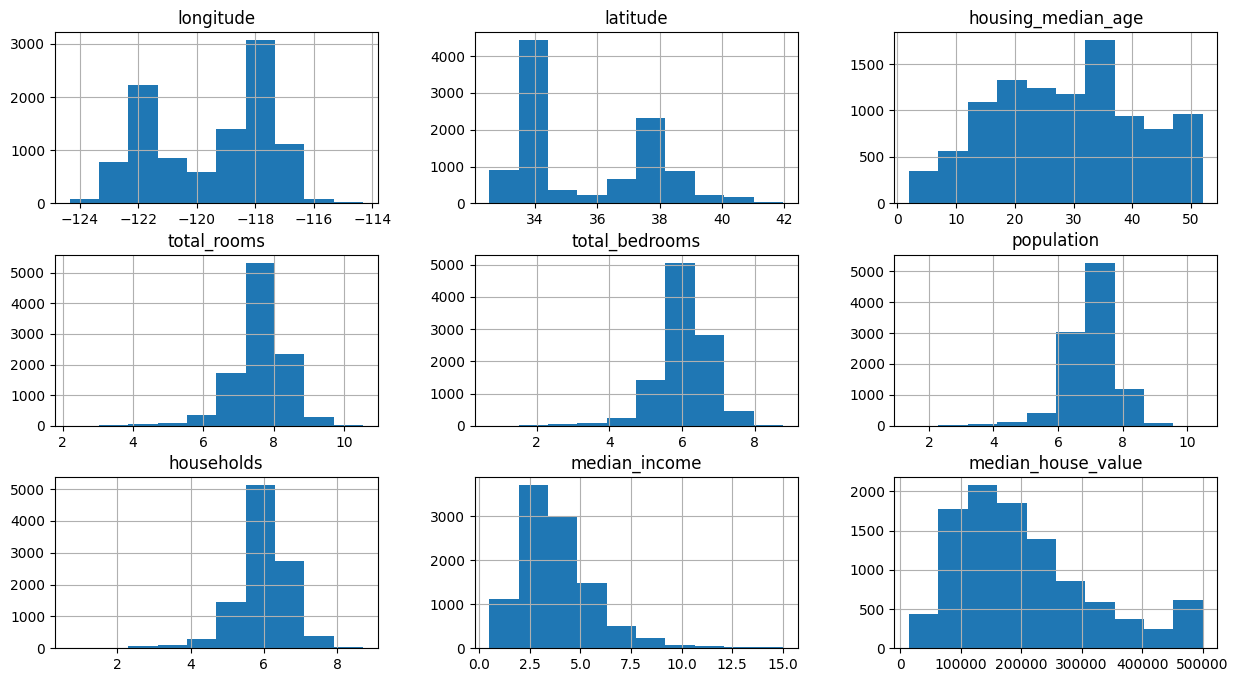

In [ ]:
train_data.hist(figsize = (15,8))

   >**Here we can use the ocean proximity feature as it is a primary factor in determining the price. If one house is near the beach then it will probably be expensive, if it is not then that means it has to not be expensive.**



In [ ]:
#Here we can see the categories in the ocean proximity value of the dataset
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     4509
INLAND        3278
NEAR OCEAN    1327
NEAR BAY      1100
ISLAND           2
Name: count, dtype: int64

Here we see categories under the ocean proximity


In [ ]:
#Here we are gonnna change all of the values into features by removing the "Ocean Proximity"
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

In [ ]:
#Here we can see the data
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14299,-117.14,32.71,34.0,7.435438,6.122493,7.291656,6.054439,2.1164,139400.0,False,False,False,False,True
7445,-118.16,33.94,32.0,7.701200,6.124683,7.147559,6.184149,4.7708,178600.0,True,False,False,False,False
7069,-118.02,33.95,36.0,7.398174,5.690359,6.682109,5.648974,4.2292,179500.0,True,False,False,False,False
3459,-118.44,34.30,38.0,7.375256,5.752573,7.074963,5.793014,3.4000,155500.0,True,False,False,False,False
19953,-119.33,36.22,29.0,7.459339,5.780744,6.692084,5.683580,3.5039,89900.0,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,-119.00,35.36,39.0,6.799056,5.384495,6.692084,5.288267,1.2500,42500.0,False,True,False,False,False
11679,-117.99,33.84,34.0,7.640123,5.840642,7.229839,5.866468,5.1030,207000.0,True,False,False,False,False
13501,-117.35,34.15,32.0,7.901007,6.315358,7.643483,6.313548,2.2974,84500.0,False,True,False,False,False
8597,-118.37,33.88,20.0,7.799753,6.163315,7.106606,6.210600,5.9619,335900.0,True,False,False,False,False


<Axes: >

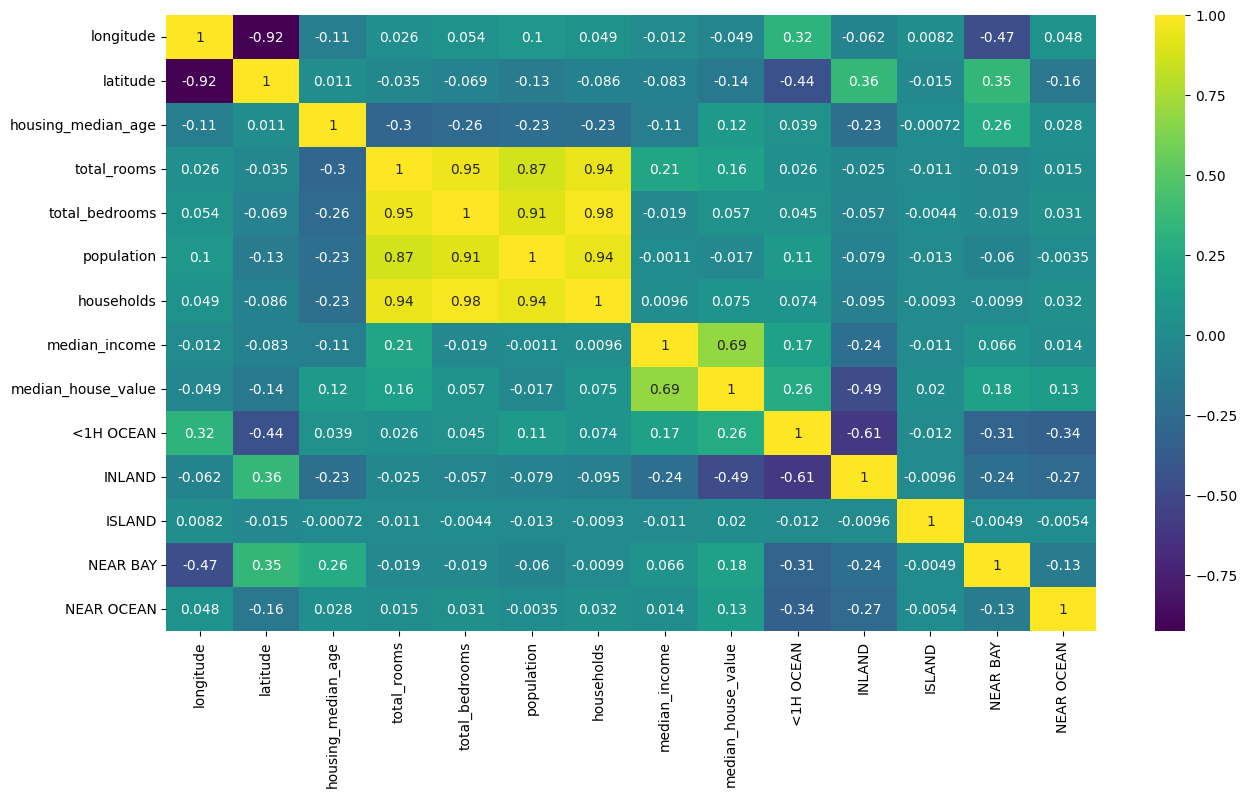

In [ ]:
#Here we create another heatmap but with the features that have been created and see correlations
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(),annot = True, cmap = 'viridis')

Here we can see that if we were to get a house inland it would be very inexpensive and if it was on the Island all the way near the ocean then it would be very expensive. As we look at the median_house_value on the X part of the axis and the the y part of the axis from (Inland - Near Ocean).



<Axes: xlabel='latitude', ylabel='longitude'>

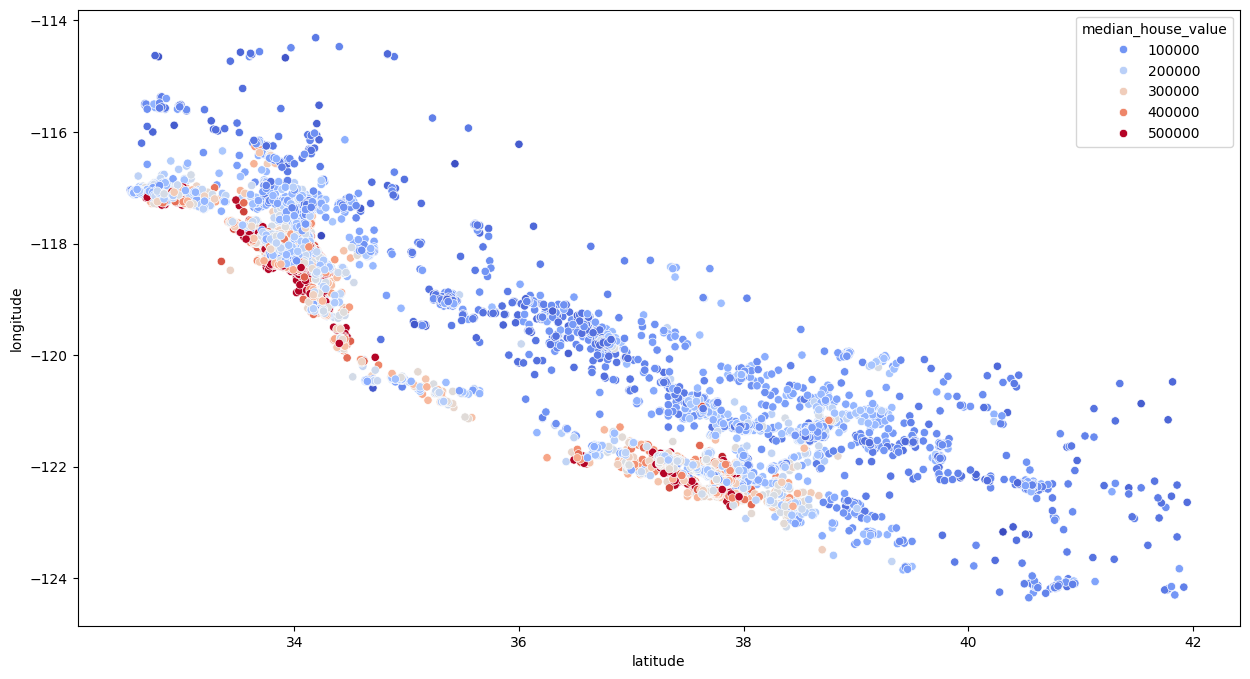

In [ ]:
#Here we created a scatterplot to represent the house prices based on where they were, meaning if they were near the bottom it would be expensive but if they are at the top it is not expensive.
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette= "coolwarm")

Here we can see that if people are near the beach their hourses are expensive (400000 - 500000)

In [ ]:
#We use the bedroom ratio and household rooms by dividing the bedrooms by the rooms and rooms by households
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms']
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households']

<Axes: >

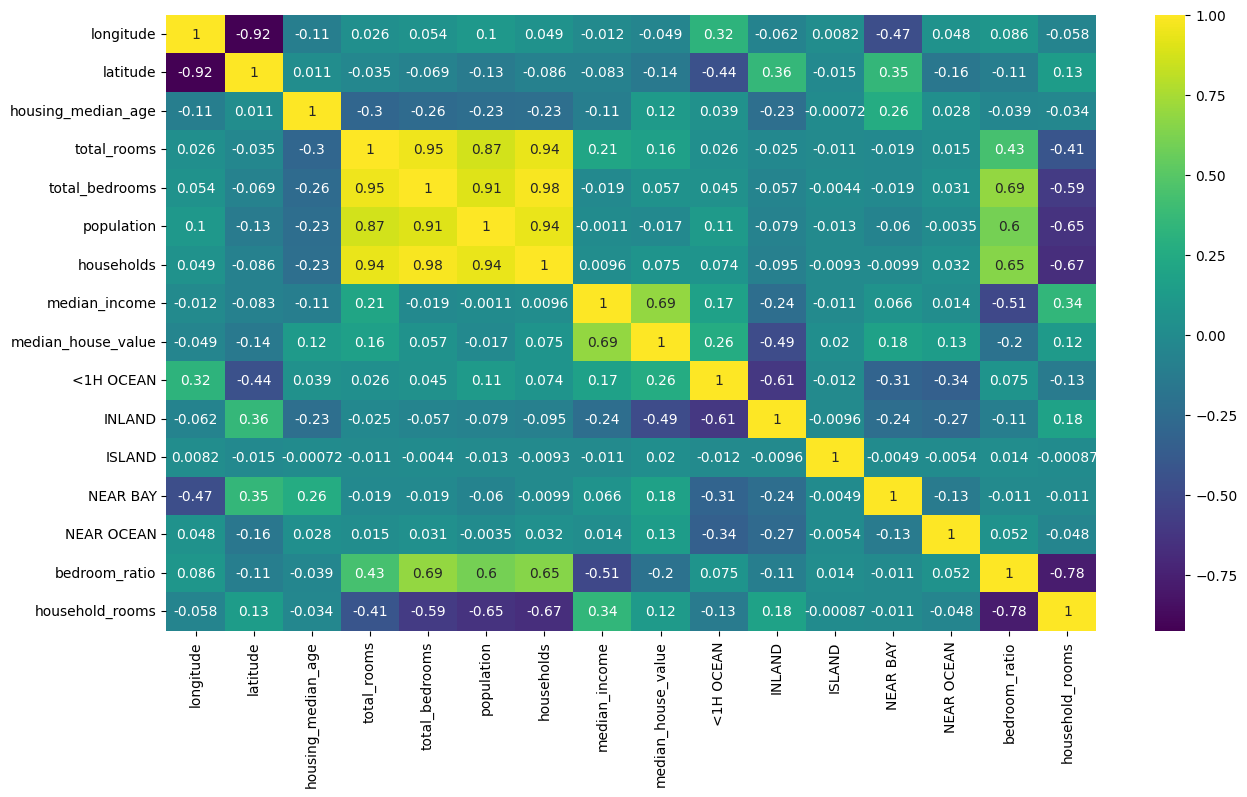

In [ ]:
#Here we create another correlation heatmap for seeing the correlation
plt.figure(figsize = (15,8))
sns.heatmap(train_data.corr(),annot = True, cmap = 'viridis')

In [ ]:
#Here I am using Linear Regression
from sklearn.linear_model import LinearRegression
#Here I mapped the X and Y trains to the key feature of the median house value
X_train, y_train = train_data.drop(['median_house_value'],axis = 1), train_data['median_house_value']
#Created a linear regression
Reg = LinearRegression()
#Used the X and Y train's to fit it into model
Reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Here we are setting up the test data
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+ 1)
test_data['population'] = np.log(test_data['population']+ 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+ 1)
test_data['households'] = np.log(test_data['households']+ 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis = 1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']


In [ ]:
#We do the same thing for the test data as we did for the train data
X_test, y_test = test_data.drop(['median_house_value'],axis = 1), test_data['median_house_value']

Both the test and train data had 15 columns and were almost similar

In [ ]:
Reg.score(X_test,y_test)

0.6699157009251495

Has a decent score, not a good nor bad accuracy but can be improved

---



In [ ]:
# Get the train and test results
y_train_pred = Reg.predict(X_train)
y_test_pred = Reg.predict(X_test)

# Print the results
print('Train R-squared:', Reg.score(X_train, y_train))
print('Test R-squared:', Reg.score(X_test, y_test))

Train R-squared: 0.6716963787429765
Test R-squared: 0.6699157009251495


# Checking the DATA from the DATASET

In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
314,-122.19,37.76,41.0,6.826545,5.337538,6.259581,5.075174,1.2083,72500.0,False,False,False,True,False,0.781880,1.345086
10893,-117.87,33.72,37.0,7.703910,6.210600,7.802209,6.228511,3.8421,174000.0,True,False,False,False,False,0.806162,1.236878
14059,-117.13,32.75,37.0,8.329175,6.939254,7.568896,6.876265,2.6930,174100.0,False,False,False,False,True,0.833126,1.211294
14340,-117.16,32.74,49.0,7.504392,6.206576,6.400257,6.018593,3.0571,418800.0,False,False,False,False,True,0.827059,1.246868
14190,-117.07,32.71,26.0,8.331345,6.714171,7.945555,6.548219,2.8372,123400.0,False,False,False,False,True,0.805893,1.272307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6364,-117.97,34.15,33.0,7.813996,6.159095,7.145984,6.082219,6.4576,500001.0,False,True,False,False,False,0.788213,1.284728
15818,-122.42,37.76,52.0,7.309881,6.415097,7.396949,6.381816,1.6500,265000.0,False,False,False,True,False,0.877592,1.145423
17154,-122.21,37.43,23.0,8.655563,6.920672,7.519692,6.790097,5.7211,500001.0,False,False,False,False,True,0.799563,1.274733
7988,-118.18,33.85,38.0,8.187855,6.760415,7.790282,6.725034,3.6897,169800.0,True,False,False,False,False,0.825664,1.217519


In [ ]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14299,-117.14,32.71,34.0,7.435438,6.122493,7.291656,6.054439,2.1164,139400.0,False,False,False,False,True,0.823421,1.228097
7445,-118.16,33.94,32.0,7.701200,6.124683,7.147559,6.184149,4.7708,178600.0,True,False,False,False,False,0.795289,1.245313
7069,-118.02,33.95,36.0,7.398174,5.690359,6.682109,5.648974,4.2292,179500.0,True,False,False,False,False,0.769157,1.309649
3459,-118.44,34.30,38.0,7.375256,5.752573,7.074963,5.793014,3.4000,155500.0,True,False,False,False,False,0.779983,1.273129
19953,-119.33,36.22,29.0,7.459339,5.780744,6.692084,5.683580,3.5039,89900.0,False,True,False,False,False,0.774967,1.312437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,-119.00,35.36,39.0,6.799056,5.384495,6.692084,5.288267,1.2500,42500.0,False,True,False,False,False,0.791947,1.285687
11679,-117.99,33.84,34.0,7.640123,5.840642,7.229839,5.866468,5.1030,207000.0,True,False,False,False,False,0.764470,1.302338
13501,-117.35,34.15,32.0,7.901007,6.315358,7.643483,6.313548,2.2974,84500.0,False,True,False,False,False,0.799311,1.251437
8597,-118.37,33.88,20.0,7.799753,6.163315,7.106606,6.210600,5.9619,335900.0,True,False,False,False,False,0.790194,1.255878


Both the Train and Test data have the same amount of columns

In [ ]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,...,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
314,-122.19,37.76,41.0,6.826545,5.337538,...,False,True,False,0.781880,1.345086
10893,-117.87,33.72,37.0,7.703910,6.210600,...,False,False,False,0.806162,1.236878
14059,-117.13,32.75,37.0,8.329175,6.939254,...,False,False,True,0.833126,1.211294
14340,-117.16,32.74,49.0,7.504392,6.206576,...,False,False,True,0.827059,1.246868
14190,-117.07,32.71,26.0,8.331345,6.714171,...,False,False,True,0.805893,1.272307
...,...,...,...,...,...,...,...,...,...,...,...
6364,-117.97,34.15,33.0,7.813996,6.159095,...,False,False,False,0.788213,1.284728
15818,-122.42,37.76,52.0,7.309881,6.415097,...,False,True,False,0.877592,1.145423
17154,-122.21,37.43,23.0,8.655563,6.920672,...,False,False,True,0.799563,1.274733
7988,-118.18,33.85,38.0,8.187855,6.760415,...,False,False,False,0.825664,1.217519


In [ ]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
14299,-117.14,32.71,34.0,7.435438,6.122493,7.291656,6.054439,2.1164,False,False,False,False,True,0.823421,1.228097
7445,-118.16,33.94,32.0,7.701200,6.124683,7.147559,6.184149,4.7708,True,False,False,False,False,0.795289,1.245313
7069,-118.02,33.95,36.0,7.398174,5.690359,6.682109,5.648974,4.2292,True,False,False,False,False,0.769157,1.309649
3459,-118.44,34.30,38.0,7.375256,5.752573,7.074963,5.793014,3.4000,True,False,False,False,False,0.779983,1.273129
19953,-119.33,36.22,29.0,7.459339,5.780744,6.692084,5.683580,3.5039,False,True,False,False,False,0.774967,1.312437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2930,-119.00,35.36,39.0,6.799056,5.384495,6.692084,5.288267,1.2500,False,True,False,False,False,0.791947,1.285687
11679,-117.99,33.84,34.0,7.640123,5.840642,7.229839,5.866468,5.1030,True,False,False,False,False,0.764470,1.302338
13501,-117.35,34.15,32.0,7.901007,6.315358,7.643483,6.313548,2.2974,False,True,False,False,False,0.799311,1.251437
8597,-118.37,33.88,20.0,7.799753,6.163315,7.106606,6.210600,5.9619,True,False,False,False,False,0.790194,1.255878


Here is the test data

In [ ]:
test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
314,-122.19,37.76,41.0,6.826545,5.337538,6.259581,5.075174,1.2083,72500.0,False,False,False,True,False,0.781880,1.345086
10893,-117.87,33.72,37.0,7.703910,6.210600,7.802209,6.228511,3.8421,174000.0,True,False,False,False,False,0.806162,1.236878
14059,-117.13,32.75,37.0,8.329175,6.939254,7.568896,6.876265,2.6930,174100.0,False,False,False,False,True,0.833126,1.211294
14340,-117.16,32.74,49.0,7.504392,6.206576,6.400257,6.018593,3.0571,418800.0,False,False,False,False,True,0.827059,1.246868
14190,-117.07,32.71,26.0,8.331345,6.714171,7.945555,6.548219,2.8372,123400.0,False,False,False,False,True,0.805893,1.272307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6364,-117.97,34.15,33.0,7.813996,6.159095,7.145984,6.082219,6.4576,500001.0,False,True,False,False,False,0.788213,1.284728
15818,-122.42,37.76,52.0,7.309881,6.415097,7.396949,6.381816,1.6500,265000.0,False,False,False,True,False,0.877592,1.145423
17154,-122.21,37.43,23.0,8.655563,6.920672,7.519692,6.790097,5.7211,500001.0,False,False,False,False,True,0.799563,1.274733
7988,-118.18,33.85,38.0,8.187855,6.760415,7.790282,6.725034,3.6897,169800.0,True,False,False,False,False,0.825664,1.217519


Here we use the ensemble methods by using the RandomForest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
forest.score(X_test,y_test)

0.8006265072247084

In [ ]:
# Make predictions on the training and test sets
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

# Calculate the accuracy on the training and test sets
train_accuracy = forest.score(X_train, y_train)
test_accuracy = forest.score(X_test, y_test)

# Print the results
print("Training accuracy:", train_accuracy*100)
print("Test accuracy:", test_accuracy*100)

Training accuracy: 97.17192003153664
Test accuracy: 80.06265072247083


In [ ]:
#We use the GridSearch from sklearn module to find a better estimator
from sklearn.model_selection import GridSearchCV
#Here we defined the Regressor again
forest = RandomForestRegressor()
#Here we define the parameters that we are going to use
param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2,4,6,8]
}
# Here we define the grid search and save it to the grid search variable for it to be executed later
grid_search = GridSearchCV(forest, param_grid, cv=5,
scoring="neg_mean_squared_error", return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
forest_score = grid_search.best_estimator_

In [ ]:
forest_score.score(X_test,y_test)

0.8012464156501585

Here we finally achieved a 80% accuracy on the model which means that it is good as it was improved by 20%.